<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%204%20-%20Lesson%202%20-%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflowjs as tfjs
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

2023-07-25 04:50:57.249523: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [28]:

#!wget --no-check-certificate \
#    https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt \
#    -O /tmp/irish-lyrics-eof.txt



In [2]:
data=['Knowledge and information: Books are an excellent source of knowledge and information. They can provide us with valuable insights, ideas, and perspectives on a wide range of subjects. Reading books can also help us learn new skills and gain new knowledge.',
      'Mental stimulation: Reading books can help stimulate our minds and improve our cognitive abilities. It can help improve our vocabulary, memory, and concentration.',
      'Relaxation and stress reduction: Reading books can be a great way to relax and reduce stress. It can provide a break from the hectic pace of daily life and help us unwind.',
      'Emotional intelligence: Reading books can also help us develop our emotional intelligence. It can help us understand and empathize with different perspectives and experiences.'
      'Improved creativity: Reading books can help improve our creativity by exposing us to new ideas, perspectives, and ways of thinking.',
      'Art is a broad term that encompasses a wide range of creative expressions and mediums, including visual arts, performing arts, literature, music, and more. At its core, art is a form of human expression that communicates ideas, emotions, and experiences to others. It can be used to convey a message, tell a story, evoke an emotional response, or simply provide aesthetic enjoyment.',
      'Art can take many different forms, including painting, sculpture, photography, dance, theater, literature, and music. It can be representational or abstract, realistic or fantastical, traditional or experimental. While there is no one definitive definition of art, it is generally considered to be a form of creative expression that is valued for its aesthetic or cultural significance.',
      'Art is also often associated with skill and craftsmanship, as artists must possess a certain level of technical ability to create their work. However, art is not limited to traditional notions of beauty or technical proficiency. Many artists use their medium to challenge societal norms, provoke thought, or provide social commentary.',
      'Ultimately, the meaning and value of art is subjective, and varies from person to person. Some may appreciate art for its beauty, while others may be drawn to its emotional or intellectual depth. Regardless of ones personal taste, art has the power to inspire, challenge, and connect us with others.',
      'Education is one of the most important pillars of any society, as it shapes the knowledge and skills of individuals and prepares them for their future roles. In recent years, technology has played an increasingly significant role in education, transforming the way students learn and teachers teach. At the same time, there has been an ongoing debate about the value of a liberal arts education and the purpose of education itself. This essay will explore these three topics in more detail.',
      'The Role of Technology in Education Technology has become an integral part of education, as it provides students with access to vast amounts of information and enables them to learn in new and innovative ways. With the rise of the internet, students can now access a wealth of resources online, including textbooks, articles, and videos. This has made it easier for students to conduct research and study at their own pace, regardless of their location.',
      'In addition, technology has transformed the classroom experience, with teachers using digital tools to engage and interact with their students. For example, teachers can use online platforms to create interactive lessons, gamify learning, and assess student progress in real-time. Moreover, the COVID-19 pandemic has accelerated the adoption of remote learning, making technology an essential component of education in the 21st century.',
      'The Value of a Liberal Arts Education.A liberal arts education is a type of education that emphasizes a broad-based curriculum, including subjects such as literature, history, philosophy, and the arts. This type of education is often contrasted with a more specialized education, which focuses on a specific field or industry. The value of a liberal arts education lies in its ability to foster critical thinking, creativity, and a broad perspective on the world.',
      'The purpose of education is a subject of ongoing debate, as different stakeholders have different opinions on what the ultimate goal of education should be. Some argue that the purpose of education is to prepare students for the workforce, while others believe that education should focus on personal development and self-discovery.',
      'Technology has become an essential component of education, transforming the way students learn and teachers teach. A liberal arts education provides students with a broad-based curriculum that fosters critical thinking, creativity, and a deeper understanding of the world around them. The purpose of education is to prepare students for their future careers while also fostering personal growth and development, instilling values such as curiosity, creativity, and a sense of social responsibility. In combination, these elements provide a solid foundation for a well-rounded and successful education.',
      'The trends of youth are often considered to be the most effective means of understanding modern culture. While it is true that youth are often at the forefront of social and cultural change, it is equally important to consider the perspectives and experiences of other groups within society. By focusing solely on the trends of youth, we may overlook important aspects of modern culture that are shaped by factors such as historical context, economic forces, and political influences. Furthermore, a narrow focus on youth trends can also lead to a distorted view of culture, as the experiences and perspectives of young people may not be representative of the larger society.',
      'The notion that a leaders effectiveness can be best determined by the well-being of their citizens is a commonly held belief. However, this idea raises several questions and concerns. For example, how is "well-being" defined and measured? Are there factors beyond a leaders control that contribute to the well-being of their citizens, such as natural disasters or economic recession? Is it fair to solely attribute the success or failure of a country to its leader, without considering other factors such as the actions of previous leaders or the involvement of other countries and organizations?',
      'Furthermore, there are numerous examples of leaders who have maintained power despite having a negative impact on the well-being of their citizens. In some cases, leaders may prioritize their own interests or those of a select group over the well-being of the general population. This raises the question of whether a leaders effectiveness should be judged based on their intentions or their results.',
      'Society should focus on addressing the consequences of its own actions. If a species is endangered due to human activities such as habitat destruction, over-hunting, or pollution, then it is morally and ethically responsible to make efforts to save it. By doing so, society can mitigate the harm it has caused and demonstrate a commitment to preserving the natural world.',
      'All species play a vital role in maintaining the balance of ecosystems, regardless of the cause of their endangerment. Natural disasters, disease, and climate change are just a few examples of non-human causes of species endangerment. If society only focuses on saving species endangered by human activities, it risks overlooking species that are equally important to the health of the planet.',
      'Educational institutions have a responsibility to guide students towards a successful future and equip them with the necessary skills and knowledge to achieve their goals. However, it has become a common trend for students to chase after fields of study that they may not be suited for or have the necessary aptitude to succeed in. This can result in frustration, low academic performance, and eventually lead to dropping out of college or changing majors.',
      'Discouraging students from pursuing fields of study in which they are unlikely to succeed is a necessary step to ensure that students are not setting themselves up for failure. By providing students with accurate assessments of their strengths and weaknesses, as well as information about the demands and expectations of different fields of study, educational institutions can help students make informed decisions about their futures. Additionally, educational institutions can provide students with alternative educational paths and resources to support their growth and success in areas that align with their abilities.',
      'Furthermore, pursuing fields of study that are not a good fit can also result in a waste of time and resources. This can put a strain on the student’s finances, as well as contribute to the growing student debt crisis. By guiding students towards fields of study that they have a better chance of succeeding in, educational institutions can help to minimize the financial burden on students and ensure that their time and resources are well spent.',
      'The human mind will always be superior to machines because it has unique qualities, such as creativity, empathy, and intuition, that cannot be replicated by machines. The human mind has the ability to think beyond its programming and come up with innovative solutions to problems, whereas machines are limited by the algorithms and programming they were designed with.',
      'On the other hand, machines are rapidly advancing and improving, with the development of artificial intelligence and machine learning. Machines can process and analyze vast amounts of data at a speed that is far beyond the capability of human minds. They can also store vast amounts of information and recall it accurately, which is something that the human mind struggles to do. As machines continue to evolve, they may eventually surpass human minds in certain areas, such as mathematical calculations and decision-making based on data.',
      'In todays political climate, there is often a tendency for politicians to prioritize their own ideals over the well-being of the people they serve. This can lead to divisive and ineffective governance, as politicians become more concerned with winning arguments and pleasing their base than with finding solutions that benefit everyone. In order to best serve their constituents, it is crucial that politicians prioritize common ground and reasonable consensus over elusive ideals.',
      'On the one hand, politicians who focus solely on their own ideals risk becoming disconnected from the needs and concerns of the people they represent. This can lead to policies that are out of touch with reality and that do not effectively address the problems faced by their constituents. For example, a politician who is committed to a strict interpretation of a particular ideology may overlook practical solutions that would be more effective in addressing a particular issue.'
      ' politicians who prioritize common ground and reasonable consensus are more likely to find solutions that are broadly supported and that can have a positive impact on the lives of the people they serve. This is because these politicians are more likely to listen to the concerns and opinions of others, and to engage in constructive dialogue with',
      'The statement that peoples attitudes are determined more by their immediate situation or surroundings than by society as a whole is a debatable issue that elicits varying perspectives. On one hand, there are those who believe that ones immediate surroundings play a crucial role in shaping attitudes, while on the other hand, there are those who believe that the influence of society as a whole is stronger.',
      ' immediate surroundings such as family, friends, and work environment can have a profound impact on an individuas attitudes and beliefs. For example, people who grow up in households with conservative values are more likely to adopt similar attitudes, while those who grow up in liberal households may develop more progressive attitudes. Similarly, a persons work environment and the people they associate with at work can also play a significant role in shaping their beliefs and attitudes.',

      ]

In [3]:
tokenizer = Tokenizer()

#data = open('/tmp/poetry_text_generation_data.csv').read()
#corpus = data.lower()

#tokenizer.fit_on_texts(corpus)
tokenizer.fit_on_texts(data)
total_words = len(tokenizer.word_index) + 1

#print(tokenizer.word_index)
print("Total Sample documents: "+str(len(data)))
print("Total Words: "+str(total_words))


Total Sample documents: 28
Total Words: 671


In [6]:
data[:2]

['Knowledge and information: Books are an excellent source of knowledge and information. They can provide us with valuable insights, ideas, and perspectives on a wide range of subjects. Reading books can also help us learn new skills and gain new knowledge.',
 'Mental stimulation: Reading books can help stimulate our minds and improve our cognitive abilities. It can help improve our vocabulary, memory, and concentration.']

In [4]:
input_sequences = []
for line in data:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
print(max_sequence_len)
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

135


In [8]:
model = Sequential()
model.add(Embedding(total_words, 20, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(50,return_sequences=True)))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
print("Total Layers: "+str(len(model.layers)))

Total Layers: 4


In [9]:
earlystop = EarlyStopping(monitor='loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=50, verbose=1,callbacks=[earlystop])
#print model.summary()

Epoch 1/50
60/60 [==============================] - 21s 203ms/step - loss: 6.1439 - accuracy: 0.0412
Epoch 2/50
60/60 [==============================] - 13s 210ms/step - loss: 5.7414 - accuracy: 0.0369
Epoch 3/50
60/60 [==============================] - 12s 199ms/step - loss: 5.7038 - accuracy: 0.0380
Epoch 4/50
60/60 [==============================] - 12s 198ms/step - loss: 5.6733 - accuracy: 0.0449
Epoch 5/50
60/60 [==============================] - 12s 207ms/step - loss: 5.6168 - accuracy: 0.0485
Epoch 6/50
60/60 [==============================] - 16s 263ms/step - loss: 5.5172 - accuracy: 0.0464
Epoch 7/50
60/60 [==============================] - 16s 258ms/step - loss: 5.3602 - accuracy: 0.0533
Epoch 8/50
60/60 [==============================] - 13s 214ms/step - loss: 5.2272 - accuracy: 0.0654
Epoch 9/50
60/60 [==============================] - 12s 203ms/step - loss: 5.0824 - accuracy: 0.0718
Epoch 10/50
60/60 [==============================] - 12s 195ms/step - loss: 4.9300 - accura

## Save and Load Model

In [10]:
model.save('saved_poetry_generation.h5')
new_model = tf.keras.models.load_model('saved_poetry_generation.h5')

/usr/local/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
tfjs.converters.save_keras_model(model,'model_poetry_js')

In [12]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

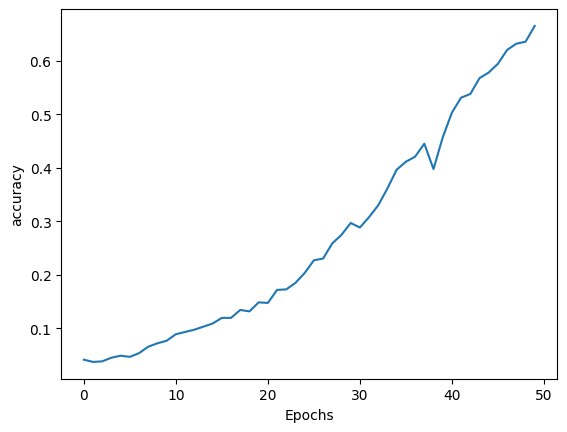

In [13]:
plot_graphs(history, 'accuracy')

In [15]:
seed_text = "art is necessary"
next_words = 20

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 43ms/step
art is necessary a subject of be advancing and improving and development and negative impact and resources being of the people being of


### Input - Output:
q:machine has the ability </br>
a:to think beyond its programming and come up with innovative solutions to problems whereas machines are limited by the algorithms

q:human brain </br>
a:can perform up about the demands and expectations of different fields of study educational institutions can help students make informed decisions about

q:art </br>
a:is also often associated with skill and craftsmanship as artists must possess a certain level of technical ability to create
